### PART A
During the work on this assignement, AI tools Gemini, ChatGPT, Github - Copilot were used when writing the code and the texts. All of the outputs were checked and modified accordingly.

Status `C:\Users\jachy\OneDrive\IES\mgr\3.semestr\Fineco\assignement1\Assignment1\Project.toml`
  [6d3278bc] ARCHModels v2.6.1
  [336ed68f] CSV v0.10.15
  [5d742f6a] CSVFiles v1.0.2
  [a93c6f00] DataFrames v1.8.1
  [31c24e10] Distributions v0.25.122
  [634d3b9d] DrWatson v2.19.1
  [587475ba] Flux v0.16.5
  [95c0ec29] ForecastPlots v0.1.0
  [f6369f11] ForwardDiff v1.2.2
  [7073ff75] IJulia v1.31.1
  [945b72a4] MarketData v0.15.0
  [429524aa] Optim v1.13.2
  [91a5bcdd] Plots v1.41.1
  [b0e4dd01] RollingFunctions v0.8.1
  [10745b16] Statistics v1.11.1
  [2913bbd2] StatsBase v0.34.7
  [f3b207a7] StatsPlots v0.15.8
⌅ [9e3dc215] TimeSeries v0.24.2
  [e4b3b0a2] YFinance v0.1.10
Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated`
Status `C:\Users\jachy\OneDrive\IES\mgr\3.semestr\Fineco\assignement1\Assignment1\Project.toml`
  [6d3278bc] ARCHModels v2.6.1
  [336ed68f] CSV v0.10.15
  [5d742f6a] CSV

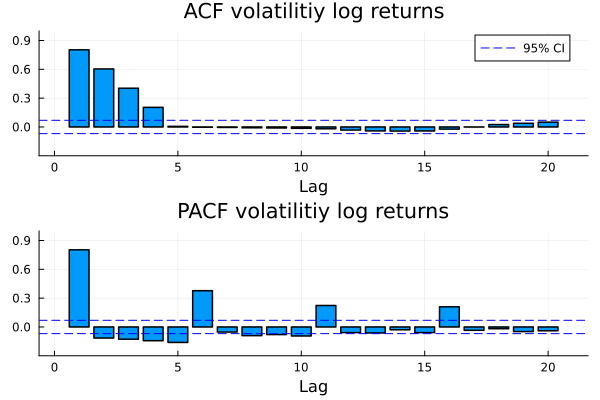

In [3]:
import Pkg

using DrWatson

@quickactivate 

Pkg.status()
include(srcdir("PartA_code.jl"))